In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-paper")
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

## reading in data

Download data from https://zenodo.org/doi/10.5281/zenodo.10698564

In [5]:
behaviour = pd.read_feather('FOLDER/ArchT.feather')
behaviour

,index,Time,Lap,Position,Velocity,Pump,Licking,PosBin60,Mouse,Day,...,ConsumLicking,Licks,AppLicks,ConsumLicks,Group,Sex,RewZone,WideRewZone,NarrowRewZone,PosBin360
0,0,0.0050,1,228.046036,7.520204,False,0.000000,38,34,1,...,0.000000,0,0.0,0.0,EYFP,male,False,False,False,228
1,1,0.0150,1,228.487252,7.428749,False,0.000000,38,34,1,...,0.000000,0,0.0,0.0,EYFP,male,False,False,False,228
2,2,0.0250,1,228.920217,7.339743,False,0.000000,38,34,1,...,0.000000,0,0.0,0.0,EYFP,male,False,False,False,228
3,3,0.0350,1,229.340044,7.251785,False,0.000000,38,34,1,...,0.000000,0,0.0,0.0,EYFP,male,False,False,False,229
4,4,0.0450,1,229.751010,7.163350,False,0.000000,38,34,1,...,0.000000,0,0.0,0.0,EYFP,male,False,False,False,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412771,5412771,606.1679,38,331.034132,NaN,False,0.000336,55,47,8,...,0.000336,0,0.0,0.0,EYFP,female,True,True,True,331
5412772,5412772,606.1779,38,331.034132,NaN,False,0.000192,55,47,8,...,0.000192,0,0.0,0.0,EYFP,female,True,True,True,331
5412773,5412773,606.1879,38,331.034132,NaN,False,0.000087,55,47,8,...,0.000087,0,0.0,0.0,EYFP,female,True,True,True,331
5412774,5412774,606.1979,38,331.034132,NaN,False,0.000026,55,47,8,...,0.000026,0,0.0,0.0,EYFP,female,True,True,True,331


In [6]:
# some summary dfs
posbins60 = behaviour.groupby(['Group', 'Mouse', 'Sex', 'Day', 'PosBin60']).mean().drop(['Time', 'Position'], axis=1)
posbins360 = behaviour.groupby(['Group', 'Mouse', 'Sex', 'Day', 'PosBin360']).mean().drop(['Time', 'Position'], axis=1)
for p in [posbins60, posbins360]:
    p['AppLicking_rel'] = p['AppLicking'] / p.groupby(['Group', 'Mouse', 'Sex', 'Day']).sum()['AppLicking']
    p = p.reset_index()
lapstats_max = behaviour.groupby(['Group', 'Mouse', 'Sex', 'Day', 'Lap']).max()
daystats = behaviour.groupby(['Group', 'Mouse', 'Sex', 'Day']).mean()
daystats['RewardedLaps'] = lapstats_max.reset_index().groupby(['Group', 'Mouse', 'Sex', 'Day'])['Pump'].sum()
daystats['Licks_Hz'] = daystats['Licks'] * 75
daystats['AppLicks_Hz'] = daystats['AppLicks'] * 75
daystats['ConsumLicks_Hz'] = daystats['ConsumLicks'] * 75
daystats

index       Time        Lap    Position  Velocity  \
Group Mouse Sex    Day                                                          
ArchT 37    male   1     126135.5   33.38485   1.280108  177.579638  1.507263   
                   2     705104.5  300.44405   6.258071  222.329560  0.873914   
                   3    1316493.5  306.38325   6.384849  204.344647  1.111621   
                   4    1948320.5  303.72085   8.274562  186.915253  1.409193   
                   5    2705978.0  601.29525  13.322088  237.307710  1.091969   
...                           ...        ...        ...         ...       ...   
EYFP  47    female 4    2371683.0  298.80565  18.490420  171.266828  3.587576   
                   5    3518644.5  601.09045  22.594986  157.756347  2.006230   
                   6    4168146.5  302.90165  20.072747  216.710589  4.099552   
                   7    4774497.5  304.74485  19.925297  234.824330  3.665826   
                   8    5382465.0  303.10645  20.657808  229.767084  4.000866   

                            Pump   Licking   PosBin60  Consumption  PumpOnset  \
Group Mouse Sex    Day                                                          
ArchT 37    male   1    0.021720  0.014986  29.117136     0.081786   0.043140   
                   2    0.014828  0.014123  36.595560     0.037295   0.000100   
                   3    0.039787  0.028140  33.577828     0.120569   0.000359   
                   4    0.050803  0.019134  30.604998     0.154517   0.000560   
                   5    0.038592  0.013425  39.094646     0.117172   0.000349   
...                          ...       ...        ...          ...        ...   
EYFP  47    female 4    0.117351  0.023137  28.062248     0.365874   0.003631   
                   5    0.067611  0.022499  25.815261     0.206109   0.001198   
                   6    0.116672  0.048175  35.633807     0.377963   0.014031   
                   7    0.116345  0.039913  38.650637     0.366887   0.003511   
                   8    0.096204  0.040332  37.811501     0.322017   0.019663   

                        ...  AppLicks  ConsumLicks   RewZone  WideRewZone  \
Group Mouse Sex    Day  ...                                                 
ArchT 37    male   1    ...  0.002397     0.000899  0.065309     0.152187   
                   2    ...  0.002613     0.000166  0.075722     0.111503   
                   3    ...  0.002627     0.000326  0.140071     0.194366   
                   4    ...  0.000905     0.000527  0.202818     0.261886   
                   5    ...  0.000524     0.000682  0.129196     0.198097   
...                     ...       ...          ...       ...          ...   
EYFP  47    female 4    ...  0.001205     0.000887  0.309717     0.442329   
                   5    ...  0.001065     0.000707  0.338202     0.449001   
                   6    ...  0.001486     0.001832  0.282469     0.375619   
                   7    ...  0.001066     0.001657  0.288082     0.470778   
                   8    ...  0.001666     0.001402  0.256413     0.449349   

                        NarrowRewZone   PosBin360  RewardedLaps  Licks_Hz  \
Group Mouse Sex    Day                                                      
ArchT 37    male   1         0.054823  177.069952             2  0.247154   
                   2         0.048496  221.886500             3  0.208444   
                   3         0.080146  203.840982            11  0.221539   
                   4         0.106792  186.421490            14  0.107418   
                   5         0.081058  236.791084            21  0.090430   
...                               ...         ...           ...       ...   
EYFP  47    female 4         0.255133  170.776828            34  0.156875   
                   5         0.235738  157.262149            37  0.132884   
                   6         0.114312  216.219280            38  0.248845   
                   7         0.245521  234.353908            35  0.2042

# Fig S2A

In [7]:
pg.mixed_anova(data=daystats.reset_index(), dv='RewardedLaps', within='Day', between='Group', 
                  subject='Mouse')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,195.3125,1,8,195.312500,0.472154,0.511422,NaN,0.055730,NaN,NaN,NaN,NaN
1,Day,3934.8875,7,56,562.126786,6.960861,0.000006,0.001104,0.465271,0.414785,False,0.00048,0.011998
2,Interaction,303.1875,7,56,43.312500,0.536342,0.803268,NaN,0.062830,NaN,NaN,NaN,NaN


In [8]:
pg.pairwise_tests(data=daystats.reset_index(), dv='RewardedLaps', within='Day', between='Group', 
                  subject='Mouse', within_first=True, padjust='bonf')

,Contrast,Day,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Day,-,1,2,True,True,-5.835047,9.0,two-sided,0.000248,0.006954,bonf,131.74,-1.088899
1,Day,-,1,3,True,True,-4.518942,9.0,two-sided,0.001449,0.040572,bonf,30.016,-1.831347
2,Day,-,1,4,True,True,-4.161359,9.0,two-sided,0.002443,0.068398,bonf,19.494,-1.791470
3,Day,-,1,5,True,True,-4.627546,9.0,two-sided,0.001241,0.034748,bonf,34.139,-2.005503
4,Day,-,1,6,True,True,-6.870728,9.0,two-sided,0.000073,0.002045,bonf,373.483,-2.370886
5,Day,-,1,7,True,True,-4.995137,9.0,two-sided,0.000744,0.020829,bonf,52.315,-2.100067
6,Day,-,1,8,True,True,-3.839059,9.0,two-sided,0.003972,0.111223,bonf,13.085,-1.225879
7,Day,-,2,3,True,True,-2.414920,9.0,two-sided,0.038934,1.000000,bonf,2.132,-0.724875
8,Day,-,2,4,True,True,-2.092289,9.0,two-sided,0.065938,1.000000,bonf,1.432,-0.829264
9,Day,-,2,5,True,True,-2.881977,9.0,two-sided,0.018120,0.507347,bonf,3.865,-1.251567


<AxesSubplot:xlabel='Day', ylabel='RewardedLaps'>

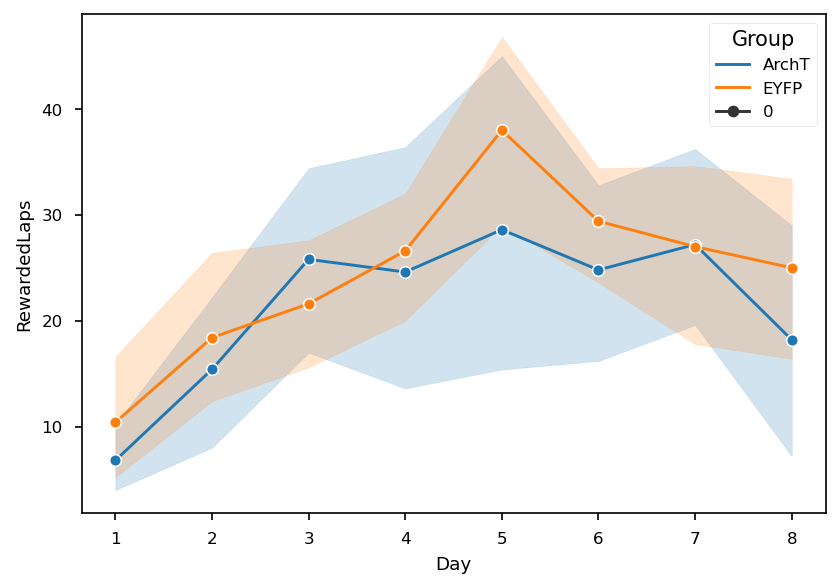

In [9]:
sns.lineplot(data=daystats.reset_index(), x='Day', y='RewardedLaps', hue='Group', markers='o', style=0)

# Fig 1H-I

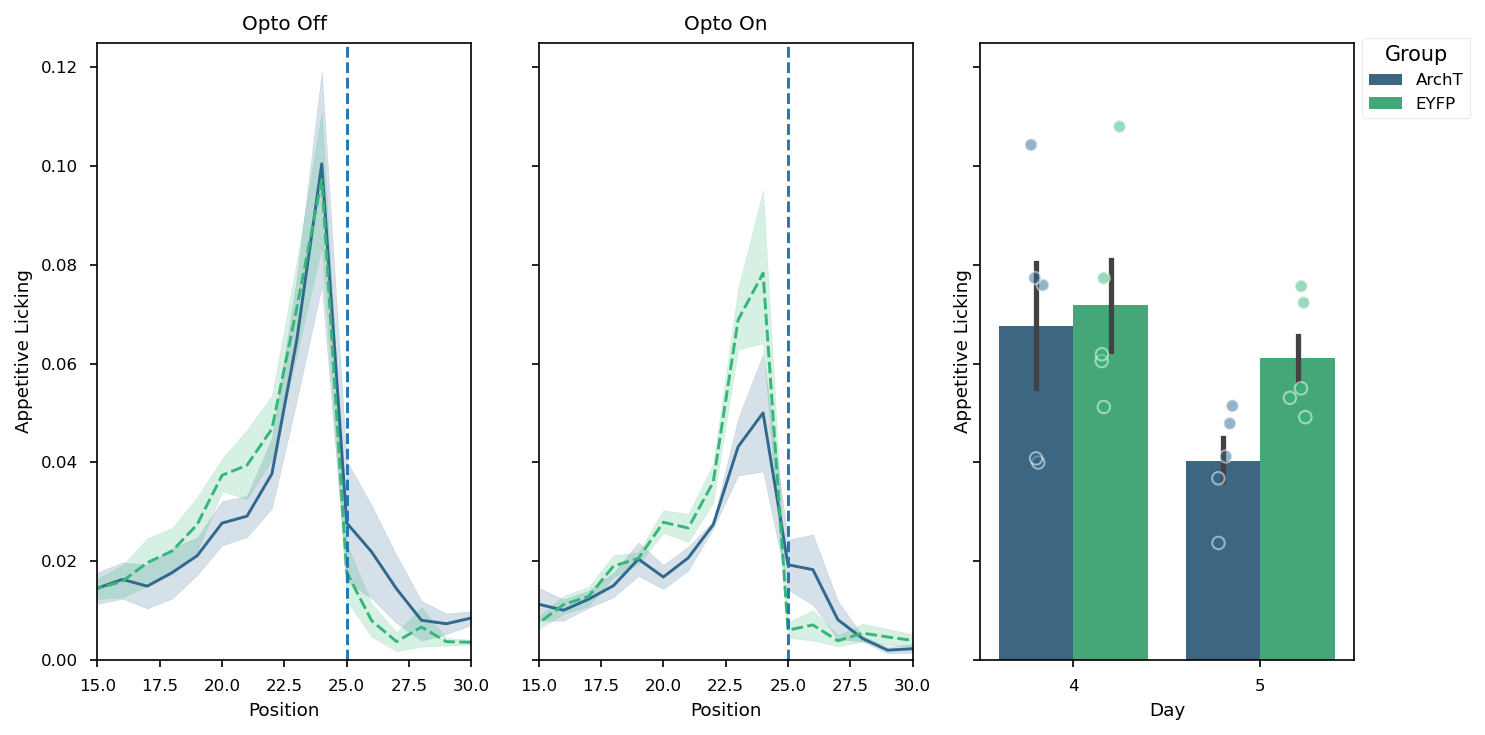

In [10]:
if 'Day' not in posbins60.columns:
    posbins60 = posbins60.reset_index()

fig, axs = plt.subplots(1,3, sharey=True, figsize=(10,5))

sns.lineplot(data=posbins60.loc[posbins60.Day==4], x='PosBin60', y='AppLicking', 
                hue='Group', palette='viridis', style='Group', ci=68, ax=axs[0], legend=None)
axs[0].set_xlim(15,30)
axs[0].axvline(25, ls='--')
axs[0].set_title('Opto Off')

sns.lineplot(data=posbins60.loc[posbins60.Day==5], x='PosBin60', y='AppLicking',
                hue='Group', palette='viridis', style='Group', ci=68, ax=axs[1], legend=None)
axs[1].set_xlim(15,30)
axs[1].axvline(25, ls='--')
axs[1].set_title('Opto On')
for ax in axs:
    ax.set_xlabel('Position')

posbins60_narrow = posbins60.loc[(posbins60.PosBin60>21)&(posbins60.PosBin60<25)].groupby(['Group', 'Mouse', 'Sex', 'Day']).mean().reset_index()

sns.barplot(data=posbins60_narrow.loc[(posbins60_narrow.Day.isin([4,5]))], hue='Group', x='Day', y='AppLicking', 
    ax=axs[2], palette='viridis', ci=68)
sns.stripplot(data=posbins60_narrow.loc[(posbins60_narrow.Day.isin([4,5]))], hue='Group', x='Day', y='AppLicking', 
    ax=axs[2], palette='viridis', dodge=True, size=6, linewidth=1, alpha=0.5, edgecolor='w')

handles, labels = axs[2].get_legend_handles_labels()
axs[2].legend(handles[2:], labels[2:], title='Group', bbox_to_anchor=(1, 1.02), loc='upper left')

for ax in axs:
    ax.set_ylabel('Appetitive Licking')

plt.tight_layout()


In [11]:
pg.mixed_anova(data=posbins60_narrow.loc[(posbins60_narrow.Day.isin([4,5]))], 
               dv='AppLicking', between='Group', within='Day', subject='Mouse')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.000780,1,8,0.000780,2.352957,0.163590,0.227274,NaN
1,Day,0.001826,1,8,0.001826,4.312274,0.071492,0.350242,1.0
2,Interaction,0.000350,1,8,0.000350,0.827200,0.389662,0.093710,NaN


In [12]:
pg.pairwise_tests(data=posbins60_narrow.loc[(posbins60_narrow.Day.isin([4,5]))], 
                   dv='AppLicking', between='Group', within='Day', subject='Mouse', padjust='bonf', within_first=True)

,Contrast,Day,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Day,-,4,5,True,True,2.096829,9.0,two-sided,0.065454,NaN,NaN,1.44,0.916967
1,Group,-,ArchT,EYFP,False,True,-1.533935,8.0,two-sided,0.163590,NaN,NaN,0.954,-0.876261
2,Day * Group,4,ArchT,EYFP,False,True,-0.261105,8.0,two-sided,0.800608,1.000000,bonf,0.503,-0.149156
3,Day * Group,5,ArchT,EYFP,False,True,-2.873660,8.0,two-sided,0.020712,0.041424,bonf,3.223,-1.641579


# Fig S2B

In [13]:
from scipy.stats import ks_2samp
if 'Day' not in posbins360.columns:
    posbins360 = posbins360.reset_index()
dist1 = posbins360.loc[(posbins360.Day==5)&(posbins360.PosBin360>90)&(posbins360.PosBin360<150)&(
        posbins360.Group=='ArchT')].groupby('PosBin360').mean()['AppLicking'].values
dist2 = posbins360.loc[(posbins360.Day==5)&(posbins360.PosBin360>90)&(posbins360.PosBin360<150)&(
        posbins360.Group=='EYFP')].groupby('PosBin360').mean()['AppLicking'].values
ks_2samp(dist1, dist2)

KstestResult(statistic=0.2711864406779661, pvalue=0.025663646031102452)

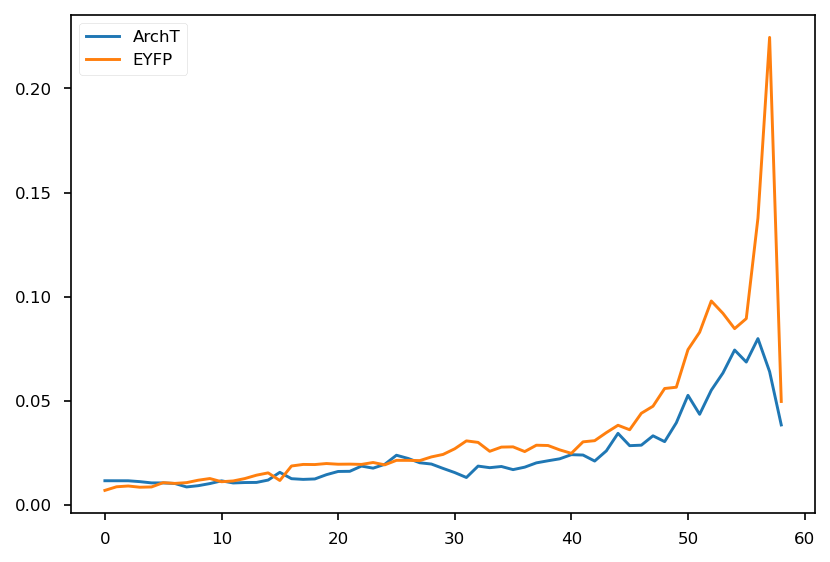

In [14]:
plt.plot(dist1, label='ArchT')
plt.plot(dist2, label='EYFP')
plt.legend()

# Fig S2C

In [15]:
if 'Group' not in daystats.columns:
    daystats = daystats.reset_index() 
pg.ttest(daystats.loc[(daystats.Group=='EYFP')&(daystats.Day==5), 'Licks_Hz'],
         daystats.loc[(daystats.Group=='ArchT')&(daystats.Day==5), 'Licks_Hz'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.556842,8,two-sided,0.592867,"[-0.05, 0.09]",0.352178,0.542,0.078295


<AxesSubplot:xlabel='Group', ylabel='Licks_Hz'>

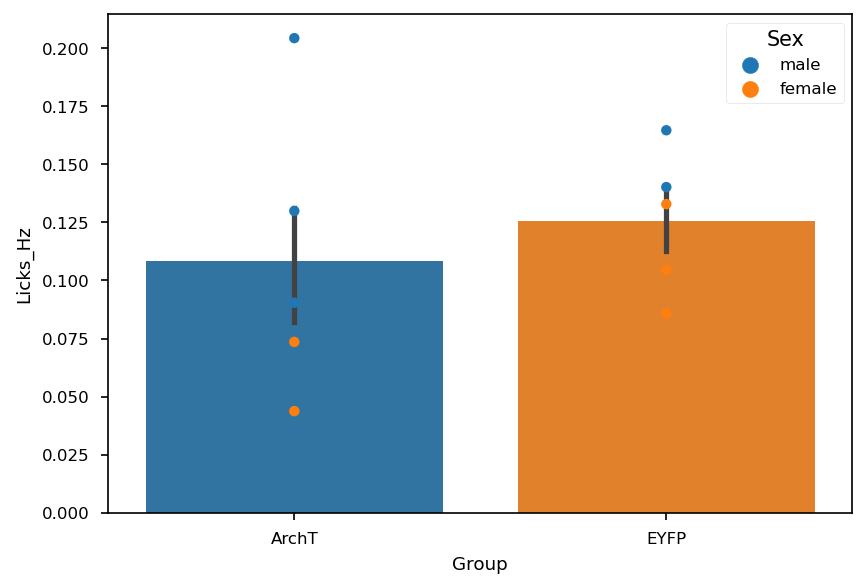

In [16]:
sns.barplot(data=daystats.loc[(daystats.Day==5)], x='Group', y='Licks_Hz', ci=68)
sns.swarmplot(data=daystats.loc[(daystats.Day==5)], x='Group', y='Licks_Hz', hue='Sex')

# Fig S2D

In [17]:
pg.ttest(daystats.loc[(daystats.Group=='EYFP')&(daystats.Day==5), 'AppLicks_Hz'],
         daystats.loc[(daystats.Group=='ArchT')&(daystats.Day==5), 'AppLicks_Hz'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.203062,8,two-sided,0.263345,"[-0.02, 0.05]",0.760883,0.752,0.186097


<AxesSubplot:xlabel='Group', ylabel='AppLicks_Hz'>

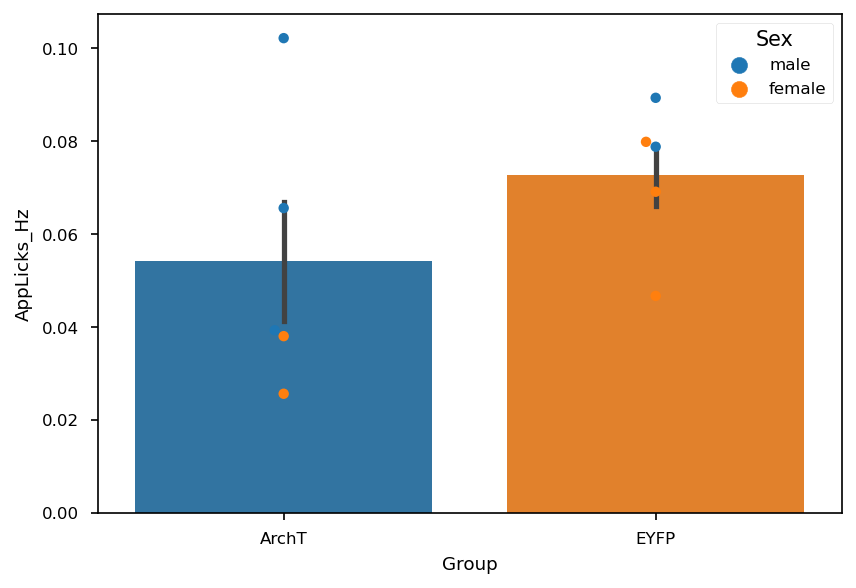

In [18]:
sns.barplot(data=daystats.loc[(daystats.Day==5)], x='Group', y='AppLicks_Hz', ci=68)
sns.swarmplot(data=daystats.loc[(daystats.Day==5)], x='Group', y='AppLicks_Hz', hue='Sex')

# Fig S2E-F

In [19]:
if 'Day' not in posbins60.columns:
    posbins60 = posbins60.reset_index()
posbins60['ConsumLickingHz'] = posbins60['ConsumLicking'] * 75
rewzone = posbins60.loc[(posbins60.PosBin60>25)&(posbins60.PosBin60<30)].groupby(
    ['Day', 'Mouse', 'Sex', 'Group']).mean().reset_index()
rewzone

,Day,Mouse,Sex,Group,PosBin60,index,Lap,Velocity,Pump,Licking,...,ConsumLicking,Licks,AppLicks,ConsumLicks,RewZone,WideRewZone,NarrowRewZone,PosBin360,AppLicking_rel,ConsumLickingHz
0,1,34,male,EYFP,27.5,3.094433e+04,12.137683,1.563428,0.253054,0.050928,...,0.039233,0.005081,0.000108,0.004973,0.999435,0.999435,0.0,167.651422,0.027887,2.942440
1,1,35,male,EYFP,27.5,9.937506e+04,17.786797,2.318884,0.134684,0.023359,...,0.016135,0.003274,0.000890,0.002384,1.000000,1.000000,0.0,167.147299,0.021156,1.210117
2,1,37,male,ArchT,27.5,1.273512e+05,1.607910,2.589346,0.018569,0.019563,...,0.000642,0.002000,0.002000,0.000000,1.000000,1.000000,0.0,167.522358,0.031884,0.048154
3,1,38,male,ArchT,27.5,1.604147e+05,15.605748,2.933848,0.233189,0.046582,...,0.033210,0.004813,0.000442,0.004370,1.000000,1.000000,0.0,167.035544,0.033771,2.490759
4,1,39,male,ArchT,27.5,2.174287e+05,8.954863,1.483855,0.138997,0.026365,...,0.019768,0.003757,0.001154,0.002603,0.999573,0.999573,0.0,167.240733,0.021465,1.482634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,8,41,female,ArchT,27.5,5.136986e+06,15.230113,7.003576,0.000000,0.007018,...,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,167.448788,0.011301,0.003106
76,8,42,female,ArchT,27.5,5.199935e+06,8.325048,1.830630,0.000000,0.002526,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,167.709018,0.007483,0.000000
77,8,45,female,EYFP,27.5,5.255448e+06,7.233465,4.815700,0.000000,0.002593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,167.437556,0.006247,0.000000
78,8,46,female,EYFP,27.5,5.315245e+06,8.305201,4.597129,0.000000,0.004163,...,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,167.424351,0.008484,0.000743


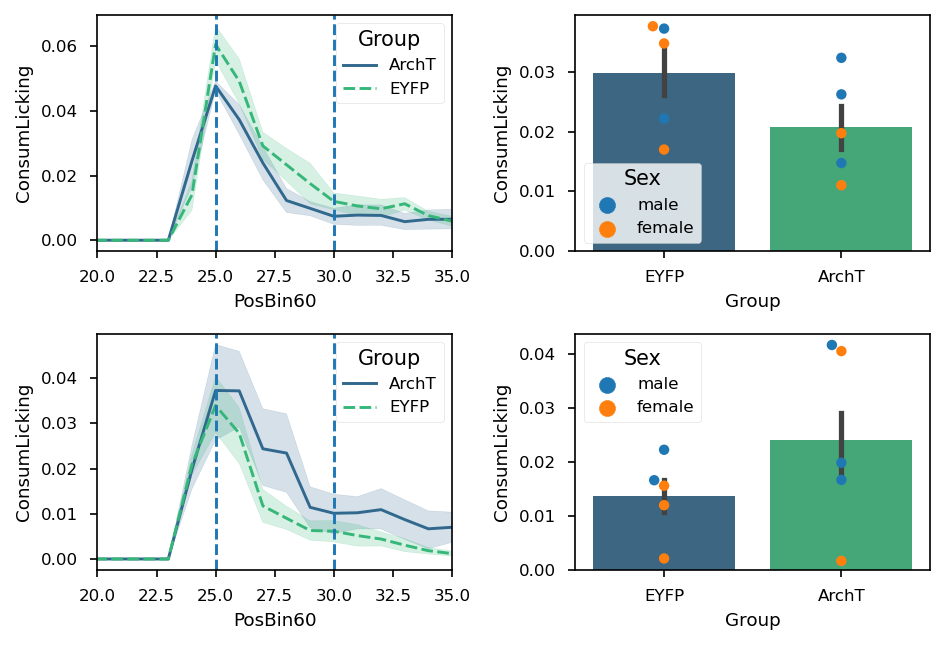

In [20]:
# consumption
if 'Day' not in posbins60.columns:
    posbins60 = posbins60.reset_index()
fig, axs = plt.subplots(2,2)

sns.lineplot(data=posbins60.loc[posbins60.Day==4], x='PosBin60', y='ConsumLicking',
                hue='Group', palette='viridis', style='Group', ci=68, legend=True, ax=axs[0,0])
axs[0,0].set_xlim(20,35)
axs[0,0].axvline(25, ls='--')
axs[0,0].axvline(30, ls='--')
sns.barplot(data=rewzone.loc[(rewzone.Day==4)], x='Group', y='ConsumLicking', ax=axs[0,1], palette='viridis', ci=68)
sns.swarmplot(data=rewzone.loc[(rewzone.Day==4)], hue='Sex', x='Group', y='ConsumLicking', ax=axs[0,1])

sns.lineplot(data=posbins60.loc[posbins60.Day==5], x='PosBin60', y='ConsumLicking',
                hue='Group', palette='viridis', style='Group', ci=68, legend=True, ax=axs[1,0])
axs[1,0].set_xlim(20,35)
axs[1,0].axvline(25, ls='--')
axs[1,0].axvline(30, ls='--')
sns.barplot(data=rewzone.loc[(rewzone.Day==5)], x='Group', y='ConsumLicking', ax=axs[1,1], palette='viridis', ci=68)
sns.swarmplot(data=rewzone.loc[(rewzone.Day==5)], hue='Sex', x='Group', y='ConsumLicking', ax=axs[1,1])

fig.tight_layout()

In [21]:
pg.ttest(rewzone.loc[(rewzone.Day==4)&(rewzone.Group=='EYFP'), 'ConsumLicking'],
         rewzone.loc[(rewzone.Day==4)&(rewzone.Group=='ArchT'), 'ConsumLicking'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.557487,8,two-sided,0.15797,"[-0.0, 0.02]",0.985041,0.971,0.279326


In [22]:
pg.ttest(rewzone.loc[(rewzone.Day==5)&(rewzone.Group=='EYFP'), 'ConsumLicking'],
         rewzone.loc[(rewzone.Day==5)&(rewzone.Group=='ArchT'), 'ConsumLicking'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.248546,8,two-sided,0.24713,"[-0.03, 0.01]",0.78965,0.776,0.196795


# Fig 1J

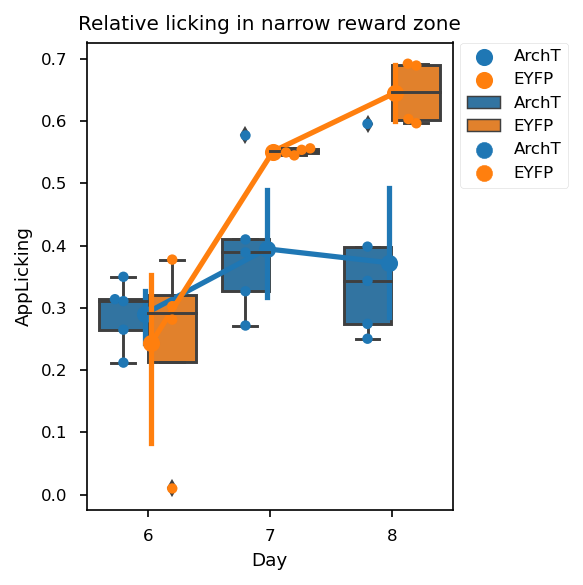

In [23]:
# Narrow reward zone performance
rewzone_narrow_rel = behaviour.loc[(behaviour.NarrowRewZone)].groupby(['Group', 'Mouse', 'Sex', 'Day']).sum() \
/ behaviour.groupby(['Group', 'Mouse', 'Sex', 'Day']).sum()#.reset_index()

rewzone_narrow_rel = rewzone_narrow_rel.reset_index()
rewzone_narrow_rel.Mouse = rewzone_narrow_rel.Mouse.astype(str)
rewzone_narrow_rel = rewzone_narrow_rel.drop(rewzone_narrow_rel.loc[(rewzone_narrow_rel.Mouse=='46')].index)#, :] = np.nan  # wrong belt

fig, ax = plt.subplots(1,1, figsize=(4,4))

ax.set_title('Relative licking in narrow reward zone');
ax.set_ylabel('Relative licking [%]');

sns.pointplot(data=rewzone_narrow_rel.loc[rewzone_narrow_rel.Day.isin([6,7,8])], x='Day', y='AppLicking', 
             hue='Group', ax=ax, dodge=True)#, estimator=None, units='Mouse');

sns.boxplot(data=rewzone_narrow_rel.loc[rewzone_narrow_rel.Day.isin([6,7,8])], x='Day', y='AppLicking', 
             hue='Group', ax=ax)#, estimator=None, units='Mouse');

sns.swarmplot(data=rewzone_narrow_rel.loc[rewzone_narrow_rel.Day.isin([6,7,8])], x='Day', y='AppLicking', 
    hue='Group', ax=ax, dodge=True)#, estimator=None, units='Mouse');

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.tight_layout()


In [24]:
pg.mixed_anova(data=rewzone_narrow_rel.loc[rewzone_narrow_rel.Day.isin([6,7,8])], within='Day', 
    dv='AppLicking', between='Group', subject='Mouse')

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,0.107822,1,7,0.107822,5.908911,0.045366,NaN,0.457739,NaN,NaN,NaN,NaN
1,Day,0.267791,2,14,0.133896,19.062341,0.000101,0.009291,0.731413,0.584842,False,0.290138,0.013156
2,Interaction,0.116799,2,14,0.058399,8.314172,0.004169,NaN,0.542907,NaN,NaN,NaN,NaN


In [25]:
pg.pairwise_tests(data=rewzone_narrow_rel.loc[(rewzone_narrow_rel.Day.isin([6,7,8])), ['AppLicking', 'Mouse', 'Group', 'Day']], 
    dv='AppLicking', between='Group', within='Day', subject='Mouse', padjust='bonf')

,Contrast,Day,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Day,-,6,7,True,True,-3.371971,8.000000,two-sided,0.009757,0.029271,bonf,6.484,-1.656169
1,Day,-,6,8,True,True,-3.184104,8.000000,two-sided,0.012917,0.038752,bonf,5.192,-1.459471
2,Day,-,7,8,True,True,-1.151397,8.000000,two-sided,0.282816,0.848449,bonf,0.544,-0.187331
3,Group,-,ArchT,EYFP,False,True,-2.508911,7.000000,two-sided,0.040461,NaN,NaN,2.138,-1.449464
4,Day * Group,6,ArchT,EYFP,False,True,0.567210,3.527520,two-sided,0.604695,1.000000,bonf,0.561,0.375152
5,Day * Group,7,ArchT,EYFP,False,True,-3.024751,4.018654,two-sided,0.038747,0.116241,bonf,3.386,-1.591378
6,Day * Group,8,ArchT,EYFP,False,True,-4.075985,5.349089,two-sided,0.008317,0.024952,bonf,8.66,-2.212520
